In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import  Input,Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [4]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("shape of X_train",x_train.shape)
print("shape of y_train",y_train.shape)

170500096/170498071 [==============================] - 11s 0us/step
shape of X_train (50000, 32, 32, 3)
shape of y_train (50000,)


In [5]:
k = len(set(y_train))
print(k)

10


In [0]:
 i = Input(shape=x_train[0].shape)
 x = Conv2D(32,(3,3),strides=2,activation='relu')(i)
 x = Conv2D(64,(3,3),strides=2,activation='relu')(x)
 x = Conv2D(128,(3,3),strides=2,activation='relu')(x)
 x = Flatten()(x)
 x = Dropout(0.2)(x)
 x = Dense(512,activation='relu')(x)
 x = Dense(k, activation='softmax')(x)

 model = Model(i,x)




In [7]:
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4891 - accuracy: 0.4592 - val_loss: 1.2146 - val_accuracy: 0.5662
Epoch 2/15
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1418 - accuracy: 0.5914 - val_loss: 1.0546 - val_accuracy: 0.6221
Epoch 3/15
1563/1563 [==============================] - 35s 22ms/step - loss: 0.9723 - accuracy: 0.6543 - val_loss: 0.9561 - val_accuracy: 0.6609
Epoch 4/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8490 - accuracy: 0.6986 - val_loss: 0.9011 - val_accuracy: 0.6807
Epoch 5/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7427 - accuracy: 0.7374 - val_loss: 0.8693 - val_accuracy: 0.7003
Epoch 6/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6561 - accuracy: 0.7675 - val_loss: 0.8620 - val_accuracy: 0.7061
Epoch 7/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.5665 - accuracy: 0.7973 - val_loss: 0.8947 -

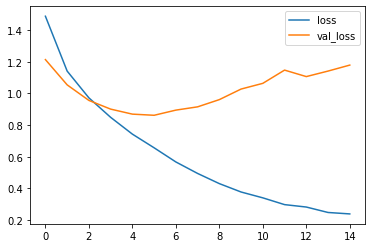

In [8]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

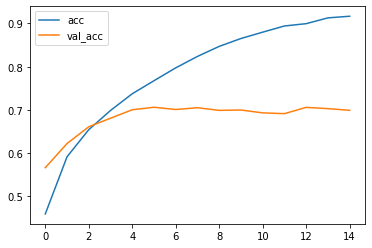

In [9]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()